# Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('../data/processed_weather_data.csv', index_col='Formatted Date', parse_dates=True)

# Average Temperature Trends From 2006 to 2016

/var/folders/xp/v8w4s0y91yl3spywrcbxpg3c0000gn/T/ipykernel_18816/463636810.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_temp = df.resample('Y')['Temperature (C)'].mean()


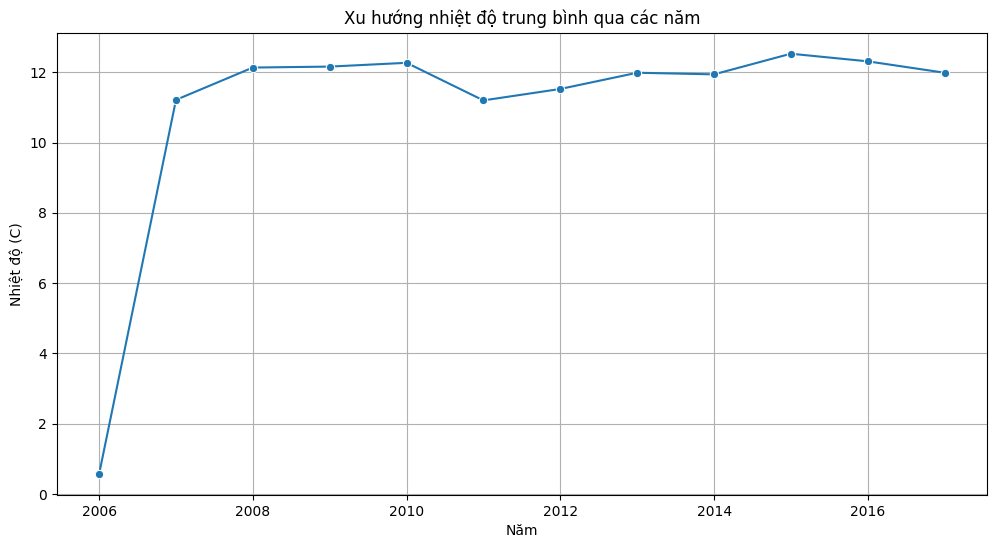

In [4]:
yearly_avg_temp = df.resample('Y')['Temperature (C)'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_temp, marker='o')
plt.title('Xu hướng nhiệt độ trung bình qua các năm')
plt.ylabel('Nhiệt độ (C)')
plt.xlabel('Năm')
plt.grid(True)
plt.savefig('../charts/yearly_temp_trend.png')

# Weather pattern relation matrix

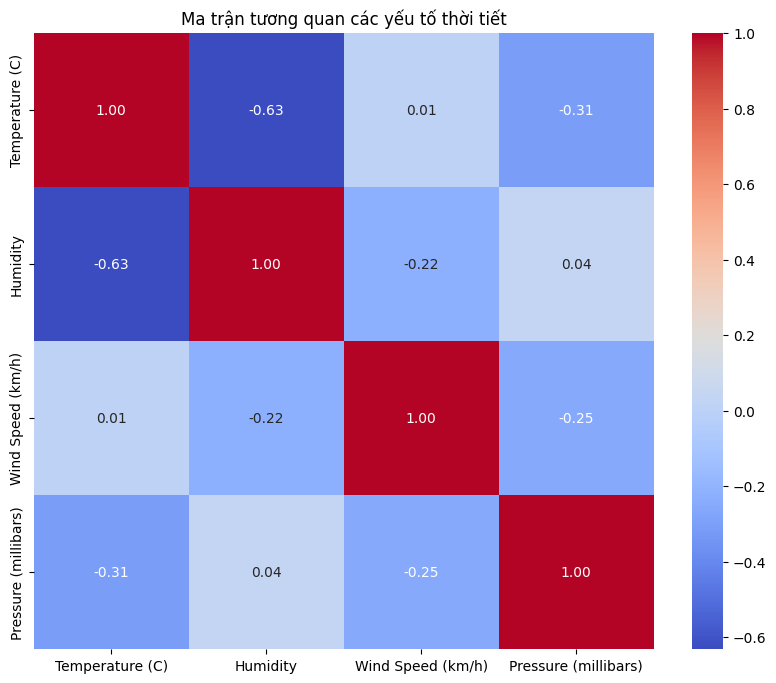

In [6]:
corr_matrix = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan các yếu tố thời tiết')
plt.savefig('../charts/correlation_heatmap.png')